<a href="https://colab.research.google.com/github/SwastikGorai/viz-cnn-layers/blob/main/midLayerViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.4.0

In [2]:
# Import the nexessary tools
import itertools 
import matplotlib.pyplot as plt  

import cv2
import numpy as np 

import tensorflow as tf 
from tensorflow.keras.models import load_model, Sequential # For creating a sub-model

In [7]:
# Load up the existing trained model 
model = load_model('model.h5')

In [ ]:
# View the model summary
model.summary()

In [9]:
# selects the TRAINED intermediate layers of the model
middlay1 =  model.layers[:3]

In [10]:
# Create a model using layers of 'middlay1'
middmodel = Sequential(middlay1)

In [ ]:
# View the summary of 'middmodel'
middmodel.summary()

In [ ]:
# View the input shape
middmodel.input_shape

In [61]:
# Load the images
imgg1 = cv2.imread('C_test.jpg')
imgg2 = cv2.imread('P_test.jpg')

In [77]:
# Resize the images according to our model(or the first layer of the model i.e 'conv2d') 
newimgg1 = cv2.resize(imgg1, (64,64))
newimgg2 = cv2.resize(imgg2, (64,64))

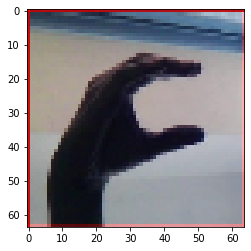

In [63]:
plt.imshow(newimgg1)

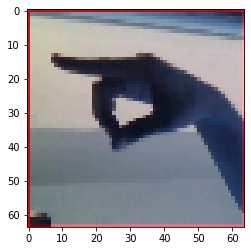

In [64]:
plt.imshow(newimgg2)

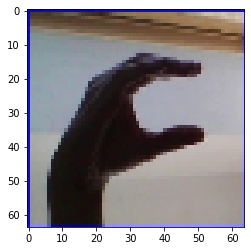

In [65]:
plt.imshow(cv2.cvtColor(newimgg1, cv2.COLOR_BGR2RGB))

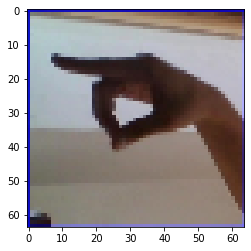

In [66]:
plt.imshow(cv2.cvtColor(newimgg2, cv2.COLOR_BGR2RGB))

In [69]:
print(newimgg1.shape, newimgg2.shape)

(64, 64, 3) (64, 64, 3)


In [80]:
yhat1 = middmodel.predict(newimgg1)
yhat2 = middmodel.predict(newimgg2) #These will throw a ValueError

ValueError: ignored

In [70]:
# Expand the dimension along the first axis to fit in the model 
expandedNewimgg1 = np.expand_dims(newimgg1, 0)
expandedNewimgg2 = np.expand_dims(newimgg2, 0)

In [74]:
yhat1 = middmodel.predict(expandedNewimgg1)
yhat2 = middmodel.predict(expandedNewimgg2)

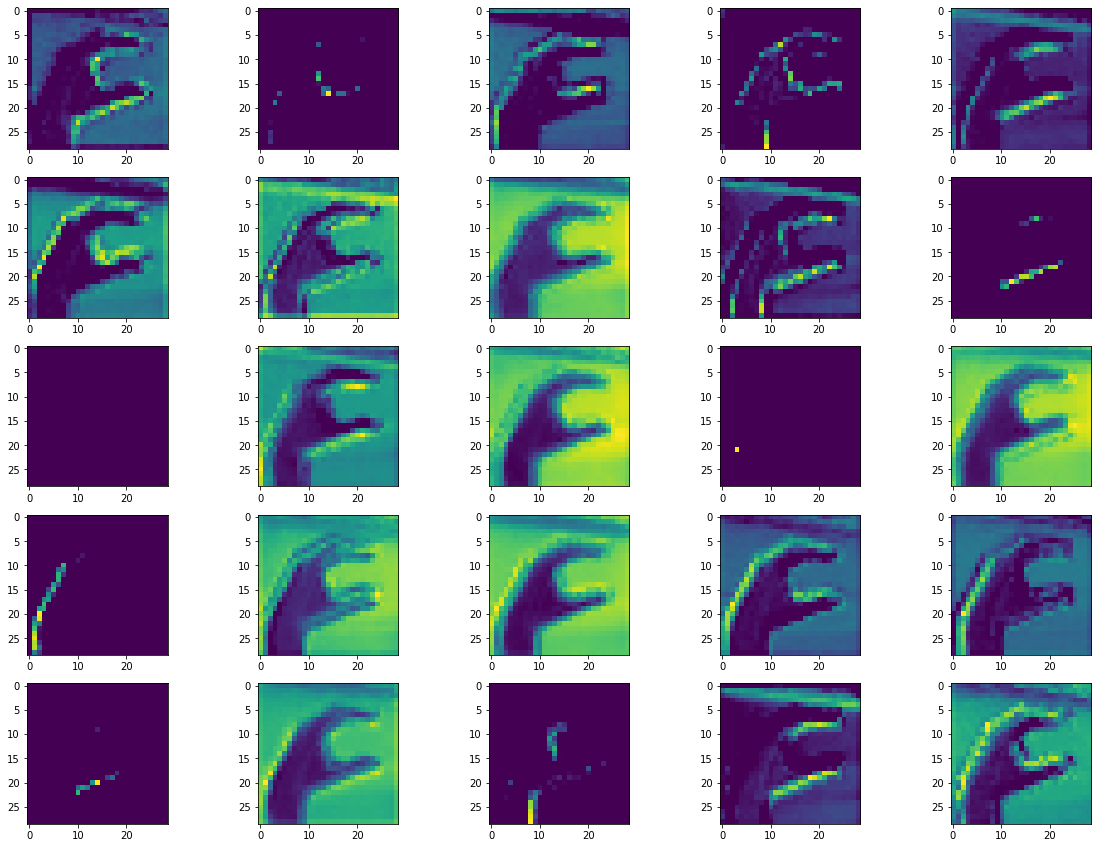

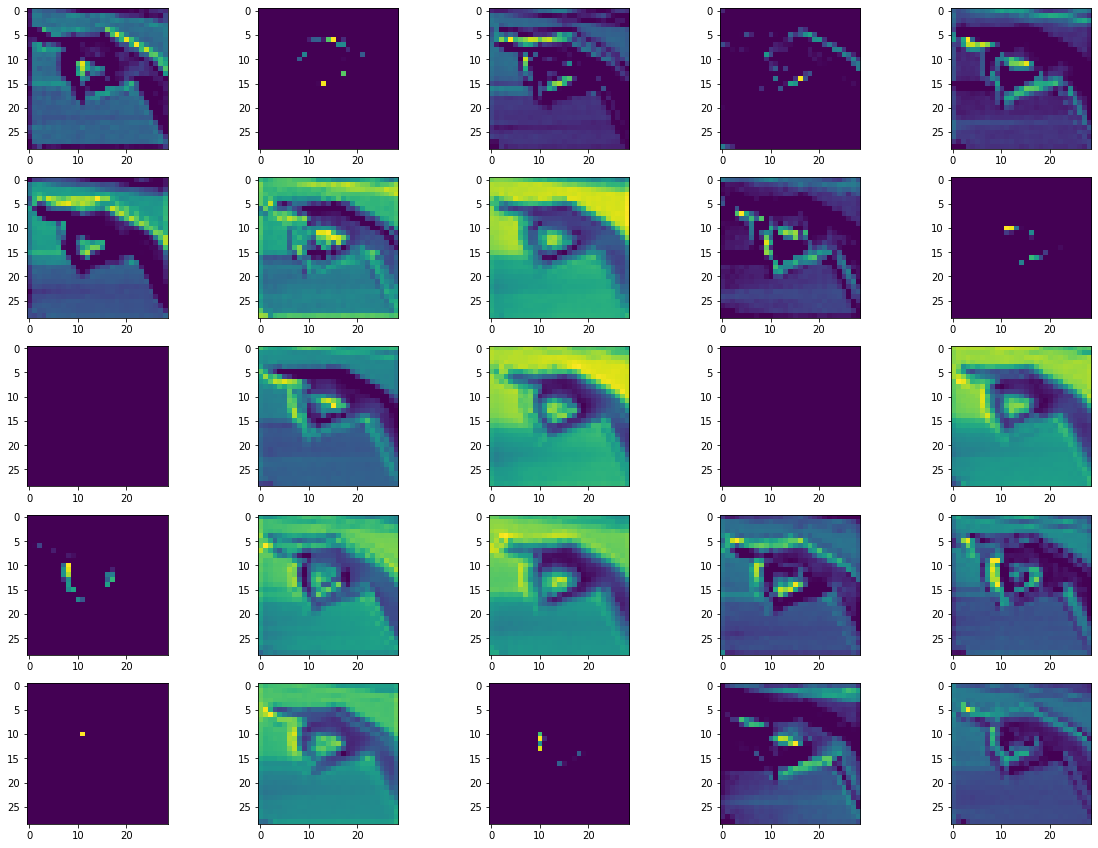

In [75]:
# Print the outputs using the imshow function
numRow = 5
numCol = 5
figur, axiz = plt.subplots(ncols=numCol, nrows=numRow, figsize=(20,15))
for indexx, axis_index in enumerate(list(itertools.product(range(numRow), range(numCol)))):
    axiz[axis_index[0], axis_index[1]].imshow(yhat1[0,:,:,indexx])

figur, axiz = plt.subplots(ncols=numCol, nrows=numRow, figsize=(20,15)) # Creates the subplots
for indexx, axis_index in enumerate(list(itertools.product(range(numRow), range(numCol)))):
    axiz[axis_index[0], axis_index[1]].imshow(yhat2[0,:,:,indexx])